### **MA-INF4325 - Lab Data Science in Practice - Spatio Temporal Data Analytics**

Supervisor : PROF. DR. ELENA DEMIDOVA

Assistant  : ALISHIBA DSOUZA           
                     
UNIVERSITY OF BONN


**Lab Topic  is Prediction of Covid-19 Spread**



*   219 Countries and Territories around the world have reported a total of 122,435,351 confirmed cases of the coronavirus(COVID-19) and a death toll of 2,704,440 deaths.
*   The aim of this project is to predict the spread of this pandemic in the countries which are highly affected by this virus. And also identifying the factors affecting the spread like government policies, healthcare systems, etc in such difficult times.
*   We will work as per below guidelines to achieve the results:
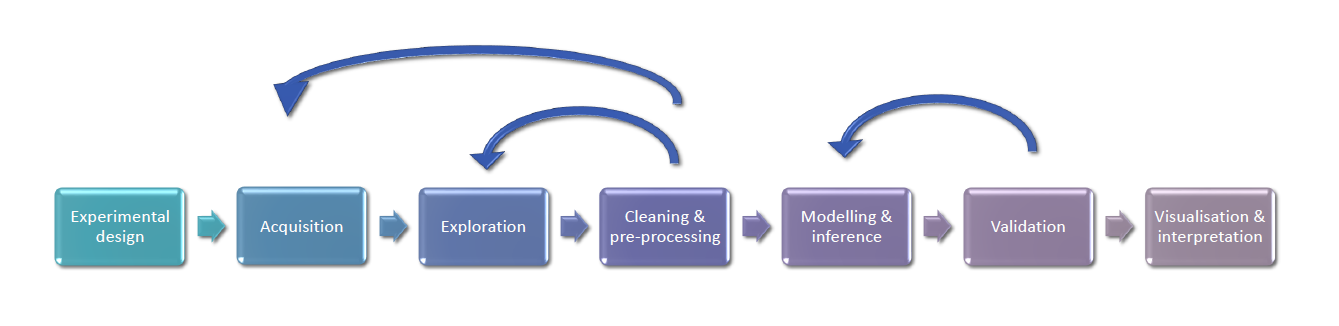

**SECTION 3 : MODEL BUILDING**

We will build two Time Series Models to predict the future trend of Confirmed Cases in USA and Germany.

In this notebook, we will build **ARIMA 'AutoRegressive Integrated Moving Average'** model to predict the future trend of pandemic in USA.

This falls under **Univariate Time Series Analysis/Forecasting** because we are only going to consider one time dependant variable that is "Confirmed_New". That's why its called as Univariate.

In [ ]:
# Installing all pre-requisits
!pip install pmdarima

In [ ]:
# IMPORTING LIBRARIES
import pandas as pd

# Mathematics
import numpy as np
from numpy import log

# Visualizations
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Machine Learning
from sklearn import preprocessing
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.graphics.tsaplots import acf
from pmdarima.arima.utils import ndiffs
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [ ]:
# To display all the available columns and rows in the output :

pd.set_option('display.max_columns', 50)
pd.set_option('display.max_columns', 50)

In [ ]:
# READING THE DATASET

covid_data = pd.read_csv('Final_Covid_Dataset.csv')
covid_data.drop(covid_data.filter(regex="Unname"),axis=1, inplace=True)                   # To drop a column named 'unnamed:0'

# SOME BASIC INFORMATION ABOUT THE DATASET

print('\n Dimensions of the Dataset:', covid_data.shape)                            # No. of rows(records) * No. of columns(features)
print('\n First Few rows are: \n', covid_data.head())                               # First few records looks like
print('\n Columns are:\n', covid_data.columns)                                      # Name of the features
print('\n Datatypes of features are:\n', covid_data.info())                         # Datatypes of the features


# Converting datatype of 'date':
covid_data['date'] = pd.to_datetime(covid_data['date'])


 Dimensions of the Dataset: (34111, 69)

 First Few rows are: 
              date          country_name  mobility_retail_and_recreation  \
0  2/15/2020 0:00  United Arab Emirates                             0.0   
1  2/16/2020 0:00  United Arab Emirates                             1.0   
2  2/17/2020 0:00  United Arab Emirates                            -1.0   
3  2/18/2020 0:00  United Arab Emirates                            -2.0   
4  2/19/2020 0:00  United Arab Emirates                            -2.0   

   mobility_grocery_and_pharmacy  mobility_parks  mobility_transit_stations  \
0                            4.0             5.0                        0.0   
1                            4.0             4.0                        1.0   
2                            1.0             5.0                        1.0   
3                            1.0             5.0                        0.0   
4                            0.0             4.0                       -1.0   

   mobili


# Predicting future trend of Confirmed Cases for USA



In [ ]:
# USA
USA_data = covid_data[covid_data['country_name'] == 'United States of America']
print('\n Dimensions of the USA dataset \n ',USA_data.shape)


 Dimensions of the USA dataset 
  (328, 69)


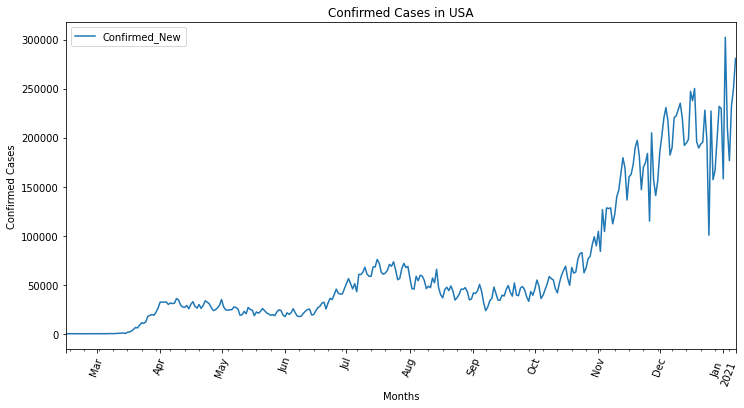

In [ ]:
# Confirmed Covid Cases in USA:
# fig = px.line(USA_data, x = USA_data['date'], y = USA_data['Confirmed_New'], title = 'Confirmed Covid Cases in USA')
# fig.update_xaxes(rangeslider_visible = True)
# fig.show()
plt.rcParams["figure.figsize"] = [12,6]

USA_data.plot.line(x="date", y='Confirmed_New')

plt.title('Confirmed Cases in USA')
plt.xlabel('Months')
plt.xticks(rotation=70)
plt.ylabel('Confirmed Cases')
plt.show()

**ARIMA for USA**

*   ARIMA stands for ‘AutoRegressive Integrated Moving Average’
*   It is a time series forecasting algorithm which uses the  past values
    of the time series to predict the future values.
*   **An ARIMA model is characterized by 3 terms: p, d, q** where,

    p is the order of the AR term

    q is the order of the MA term
    
    d is the number of differencing required to make the time series stationary



---








**Stationary or Non-Stationary :** 

The first step to build an ARIMA model is to make sure that the time series is stationary.

First, we are going to check if the series is stationary or non-stationary.






**There are three methods we will implement to check the stationarity of time series.**


*   Method 1 : Visual Test
*   Method 2 : We split our dataset and calculate the mean and variance for each group
*   Method 3 : ADF (Augmented Dickey Fuller) Test

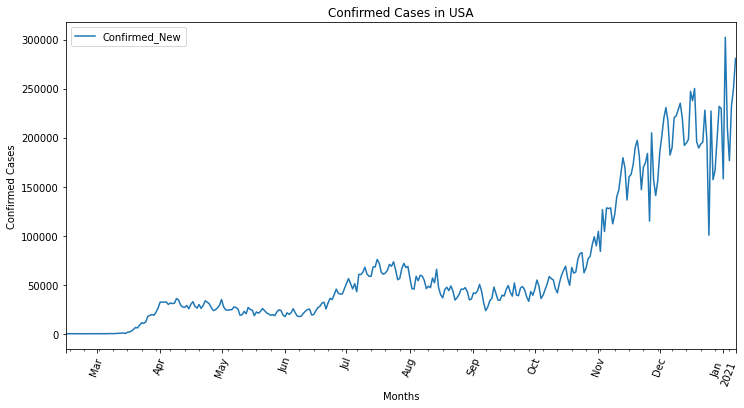

In [ ]:
# CHECKING STATIONARITY OF TIME SERIES MODEL:

# METHOD 1 : Visual Test
plt.rcParams["figure.figsize"] = [12,6]


USA_data.plot.line(x="date", y='Confirmed_New')

plt.title('Confirmed Cases in USA')
plt.xlabel('Months')
plt.xticks(rotation=70)
plt.ylabel('Confirmed Cases')
plt.show()

Here,
1. Its very clear that we have a trend (varying mean) in the above series. 
2. Variance is also changing over time.

**So, visually we see that the series is non stationary.**


In [ ]:
# METHOD 2 : We split our dataset and calculate the mean and variance for each group
data = USA_data['Confirmed_New']
split_data = int(np.round(len(data) / 2))

data1, data2 = data[0:split_data], data[split_data:]
mean1, mean2 = data1.mean(), data2.mean()
var1, var2 = data1.var(), data2.var()

print('MEAN VALUES')
print('mean1=%f, mean2=%f' % (mean1, mean2))
print(' \n VARINACE VALUES')
print('variance1=%f, variance2=%f' % (var1, var2))


MEAN VALUES
mean1=26130.841463, mean2=105798.615854
 
 VARINACE VALUES
variance1=387546199.582074, variance2=5267122628.618398


Ideally for stationary Time Series the mean and variance should be constant over time. 

But here we can see that the values of both the means are far apart from each other and values for variance varies as well. These values falls into different range groups.

This indicates that the series do not have stationary mean and variance over time.

**So, Series is non stationary.**

In [ ]:
# METHOD 3 : ADF (Augmented Dickey Fuller) Test
'''
The Dickey Fuller test is one of the most popular statistical tests.  

The null and alternate hypothesis of this test are:
Null Hypothesis:  If failed to be rejected, it suggests the time series is non-stationary.
Alternate Hypothesis: The null hypothesis is rejected; meaning that the time series is stationary. 

If we fail to reject the null hypothesis, we can say that the series is non-stationary. 
'''

def adf_test(timeseries):
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
       dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

    if dfoutput[1] <= 0.05:
      print("\n Strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data is stationary")
    else:
      print("\n Weak evidence against null hypothesis,indicating it is non-stationary ")

#apply adf test on the series
adf_test(USA_data['Confirmed_New'])

Results of Dickey-Fuller Test:
Test Statistic                   0.675235
p-value                          0.989330
#Lags Used                      16.000000
Number of Observations Used    311.000000
Critical Value (1%)             -3.451553
Critical Value (5%)             -2.870879
Critical Value (10%)            -2.571746
dtype: float64

 Weak evidence against null hypothesis,indicating it is non-stationary 


When the p-value is greater than the critical value, we fail to reject the null hypothesis (which means the series is not stationary).

In above example, **the p-value > critical value (0.98 > 0.05)**, which implies that **the series is not stationary.** This confirms our original observation which we initially saw in the visual test.

**Now, We must make the time series stationary before going further. There are different approaches to follow here :**


*   Method 1 : Differencing
*   Method 2 : Seasonal Differencing
*   Method 3 : Log Transformation








**We find the Order of differencing (d) in ARIMA model**

**METHOD 1: DIFFERENCING**

In this method, we compute the difference of consecutive terms in the series. 
Differencing is typically performed to get rid of the varying mean. Mathematically, differencing can be written as:

 y'(t) = y(t) – y(t-1)

where y(t) is the value at a time t


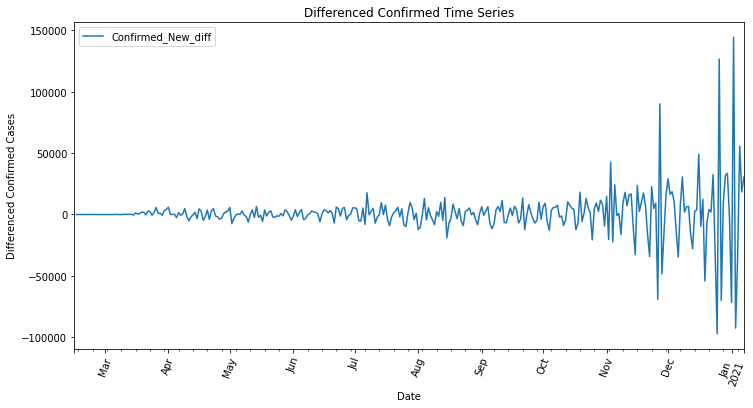


 First record is NaN as we do not have any record before it:             date  Confirmed_New  Confirmed_New_diff
32799 2020-02-15             14                 NaN

 ADF results on differenced series :

Results of Dickey-Fuller Test:
Test Statistic                  -3.481971
p-value                          0.008462
#Lags Used                      17.000000
Number of Observations Used    309.000000
Critical Value (1%)             -3.451691
Critical Value (5%)             -2.870939
Critical Value (10%)            -2.571778
dtype: float64

 Strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data is stationary


In [ ]:
# NOW, WE WILL MAKE THE SERIES STATIONARY.
'''
In order to use time series forecasting models, 
it is necessary to convert any non-stationary series to a stationary series first.
'''

# METHOD 1 : DIFFERENCING

USA_arima = USA_data[['date','Confirmed_New']]
# print(USA_arima.shape)

# CREATING COPY
USA_arima_differenced = USA_arima.copy()
# print(USA_data_arima_differenced.shape)

# Here we are differencing our time series with lag of 1
USA_arima_differenced['Confirmed_New_diff'] = USA_arima['Confirmed_New'] - USA_arima['Confirmed_New'].shift(1)      

# PLOTTING
plt.rcParams["figure.figsize"] = [12,6]

USA_arima_differenced.plot.line(x="date", y='Confirmed_New_diff')
plt.title('Differenced Confirmed Time Series')
plt.xlabel('Date')
plt.xticks(rotation=70)
plt.ylabel('Differenced Confirmed Cases')
plt.show()

# WE WILL CHECK ADF TEST AGAIN ON DIFFERENCED TIME SERIES

# Checking and removing for NaN values
print("\n First record is NaN as we do not have any record before it:", 
      USA_arima_differenced.loc[USA_arima_differenced['Confirmed_New_diff'].isna()])

# So we will drop it.
USA_arima_differenced.dropna(inplace=True)


# Checking ADF test
print('\n ADF results on differenced series :\n')
adf_test(USA_arima_differenced['Confirmed_New_diff'])

Here we can see that the **p-value < critical value (0.008 < 0.05)**. **So we have our order of differencing d = 1**

**METHOD 2: SEASONAL DIFFERENCING**

In seasonal differencing, instead of calculating the difference between consecutive values,  we calculate the difference between an observation and a previous observation from the same season. 

For example, an observation taken on a Monday will be subtracted from an observation taken on the previous Monday.

Mathematically it can be written as:

y'(t) = y(t) – y(t-n)

where y(t) is the value at a time t


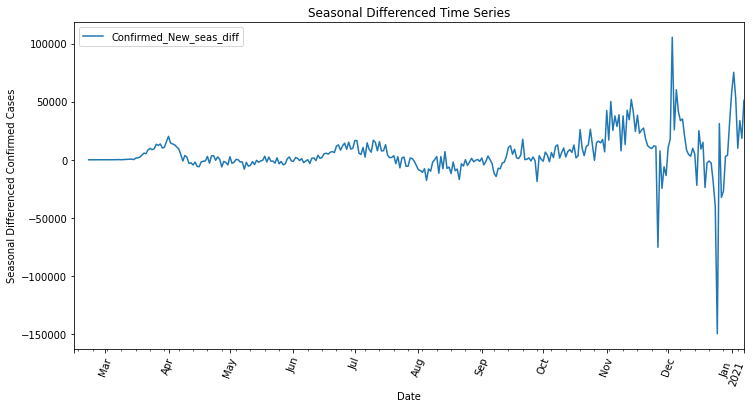


 Records having NaN values :
             date  Confirmed_New  Confirmed_New_seas_diff
32799 2020-02-15             14                      NaN
32800 2020-02-16              0                      NaN
32801 2020-02-17              0                      NaN
32802 2020-02-18              0                      NaN
32803 2020-02-19              0                      NaN
32804 2020-02-20              0                      NaN
32805 2020-02-21              2                      NaN

 ADF results on seasonal differenced series :

Results of Dickey-Fuller Test:
Test Statistic                  -3.975856
p-value                          0.001542
#Lags Used                      13.000000
Number of Observations Used    307.000000
Critical Value (1%)             -3.451831
Critical Value (5%)             -2.871001
Critical Value (10%)            -2.571811
dtype: float64

 Strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data is stationary


In [ ]:
# METHOD 2 : SEASONAL DIFFERNCING
n = 7

#  CREATING COPY : SEASONAL DIFFERENCED
USA_arima_seas_diff = USA_arima.copy()

# Here we are differencing our time series with lag of 7
USA_arima_seas_diff['Confirmed_New_seas_diff'] = USA_arima['Confirmed_New'] - USA_arima['Confirmed_New'].shift(n)

# PLOTTING
plt.rcParams["figure.figsize"] = [12,6]

USA_arima_seas_diff.plot.line(x="date", y='Confirmed_New_seas_diff')
plt.title('Seasonal Differenced Time Series')
plt.xlabel('Date')
plt.xticks(rotation=70)
plt.ylabel('Seasonal Differenced Confirmed Cases')
plt.show()

# WE WILL CHECK ADF TEST AGAIN ON SEASONAL DIFFERENCED TIME SERIES

# Checking and removing for NaN values
print('\n Records having NaN values :\n',USA_arima_seas_diff.loc[USA_arima_seas_diff['Confirmed_New_seas_diff'].isna()])
# So we will drop it.
USA_arima_seas_diff.dropna(inplace=True)

# Checking ADF test on differenced attribute:
print('\n ADF results on seasonal differenced series :\n')
adf_test(USA_arima_seas_diff['Confirmed_New_seas_diff'])

The purpose of differencing it to make the time series stationary.
**But we do not want to over-difference the series.**




**METHOD 3 : TRANSFORMATION**

Transformations are used to stabilize the non-constant variance of a series. 

Common transformation methods include power transform, square root, and log transform. 
We will do the log transformation:


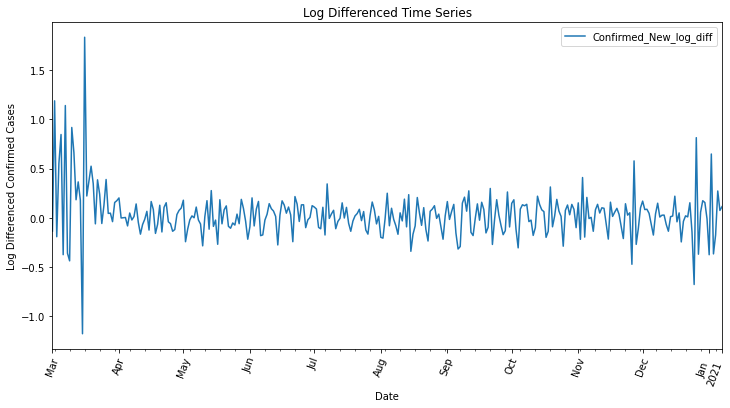


 ADF results on transformed series : 
 
Results of Dickey-Fuller Test:
Test Statistic                  -4.841374
p-value                          0.000045
#Lags Used                      15.000000
Number of Observations Used    297.000000
Critical Value (1%)             -3.452561
Critical Value (5%)             -2.871321
Critical Value (10%)            -2.571982
dtype: float64

 Strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data is stationary


In [ ]:
# METHOD 3 : TRANSFORMATION

# CREATING COPY : TRANSFORMED
USA_arima_log_trans = USA_arima.copy()
USA_arima_log_trans['Confirmed_New_log'] = np.log(USA_arima['Confirmed_New'])
USA_arima_log_trans['Confirmed_New_log_diff'] = USA_arima_log_trans['Confirmed_New_log'] - USA_arima_log_trans['Confirmed_New_log'].shift(1)

# Replacing -np.inf, np.inf with np.nan:
USA_arima_log_trans['Confirmed_New_log'] = USA_arima_log_trans['Confirmed_New_log'].replace(-np.inf, np.nan)
USA_arima_log_trans['Confirmed_New_log_diff'] = USA_arima_log_trans['Confirmed_New_log_diff'].replace(-np.inf, np.nan)
USA_arima_log_trans['Confirmed_New_log_diff'] = USA_arima_log_trans['Confirmed_New_log_diff'].replace(np.inf, np.nan)
USA_arima_log_trans.dropna(inplace = True)
# print(USA_arima_log_trans.head(50))

# PLOTTING
plt.rcParams["figure.figsize"] = [12,6]

USA_arima_log_trans.plot.line(x="date", y='Confirmed_New_log_diff')
plt.title('Log Differenced Time Series')
plt.xlabel('Date')
plt.xticks(rotation=70)
plt.ylabel('Log Differenced Confirmed Cases')
plt.show()

# Checking ADF test on transformed series:
print('\n ADF results on transformed series : \n ')
adf_test(USA_arima_log_trans['Confirmed_New_log_diff'])

**Determining order of differencing using ndiffs** 

We will use ndiffs to estimate the number of differences required to make a given time series stationary

In [ ]:
# We can get to know the order of differencing using ndiffs
y = USA_arima['Confirmed_New']

## Adf Test
ndiffs(y, test='adf')  # 1

# # # KPSS test
ndiffs(y, test='kpss')  # 1

# # # PP test:
ndiffs(y, test='pp')  # 1

1

**So, Order of differencing (d) is 1.**

---



**We find the order of the AR term (p) -**

Here we identify if the model needs any AR terms. p is the order of the Auto Regressive (AR) term. It refers to the number of lag terms to be used as predictors.

We can find out the required number of AR terms by observing the Partial Autocorrelation (PACF) plot.

Just by plotting the series, making it Stationary, and plotting ACF and PACF we have basic idea where should we start with our Time Series Analysis.


**PARTIAL AUTOCORRELATION FUNCTION**

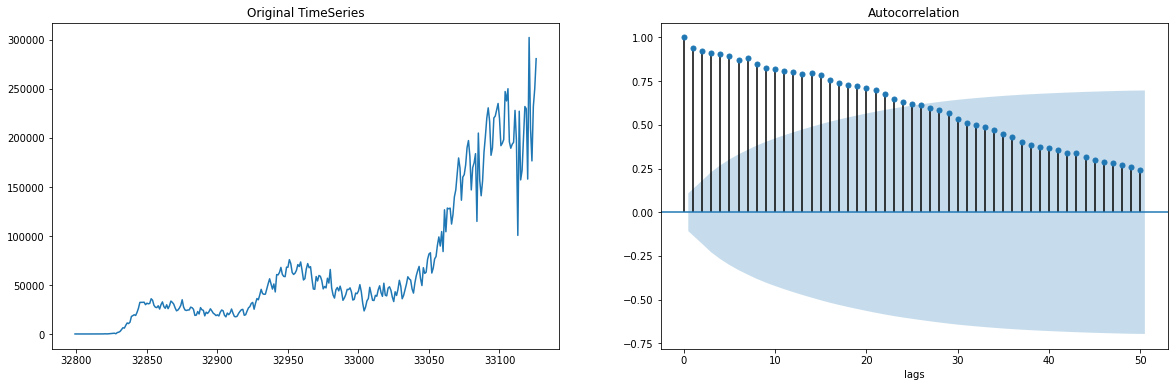

In [ ]:
# ORIGINAL TIMESERIES:

plt.rcParams["figure.figsize"] = [20,6]
fig, (ax1,ax2) = plt.subplots(1,2)

ax1.plot(USA_arima.Confirmed_New)
ax1.set_title('Original TimeSeries')
plot_acf(USA_arima.Confirmed_New, lags = 50, ax=ax2)
ax2.set_xlabel('lags')
plt.show() 

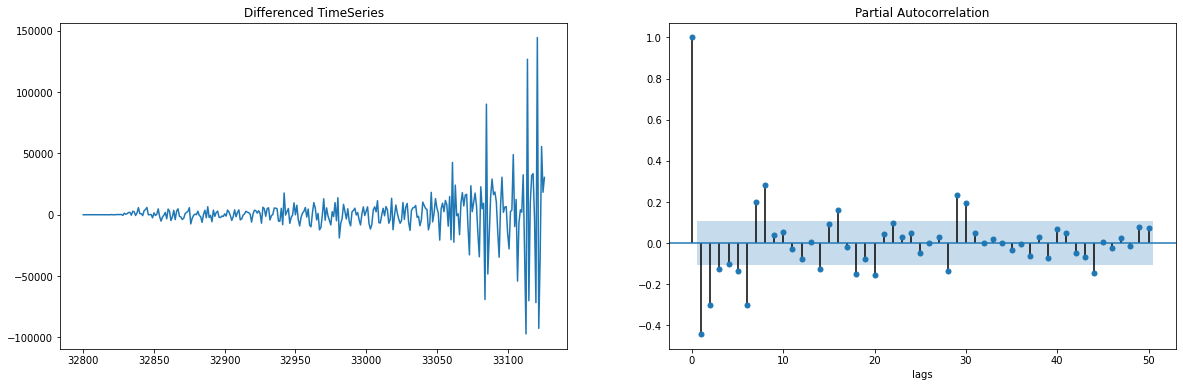

In [ ]:
# DIFFERENCED TIMESERIES:
plt.rcParams["figure.figsize"] = [20,6]
fig, (ax1,ax2) = plt.subplots(1,2)

ax1.plot(USA_arima_differenced.Confirmed_New_diff)
ax1.set_title('Differenced TimeSeries')
plot_pacf(USA_arima_differenced.Confirmed_New_diff, lags = 50, ax=ax2)
ax2.set_xlabel('lags')
plt.show() 

We look at the PACF plot for the number of AR terms.

Based on above PACF plot of differenced time series, **we should have Auto Regressive model with lags 1,2,6,7,8,9**

This gives us the strong idea where we should start with our time series analysis. 




 

**So, order of AR terms (p) can be 1,2,6,7,8**

---




**We find the order of the MA term (q) -**

MA term is technically, the error of the lagged forecast. We look at the ACF plot for the number of MA terms. 

The ACF tells how many MA terms are required to remove any autocorrelation in the stationarized series.

Based on decaying ACF, we are likely dealing with an Auto Regressive process. ACF Shows deminishing beghavious over time.


**AUTOCORRELATION**

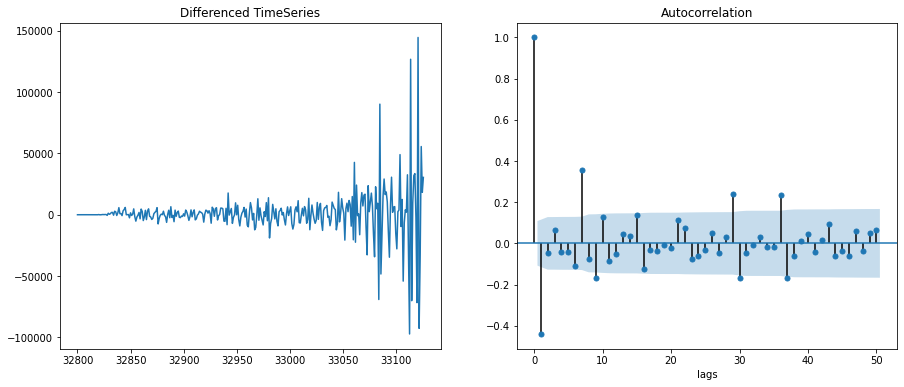

In [ ]:
# DIFFERENCED TIMESERIES:

plt.rcParams["figure.figsize"] = [15,6]
fig, (ax1,ax2) = plt.subplots(1,2)

ax1.plot(USA_arima_differenced.Confirmed_New_diff)
ax1.set_title('Differenced TimeSeries')
plot_acf(USA_arima_differenced.Confirmed_New_diff, lags = 50, ax=ax2)
ax2.set_xlabel('lags')
plt.show()   

We look at the ACF plot for the number of MA terms.

Based on above ACF plot of differenced time series, **we should have MA model with lags 1,7**
q can take 1,7

**SO FINALLY WE BUILD THE ARIMA MODEL WITH FOLLOWING PARAMETERS** **(p,d,q)**

p = 1,2,6,7,8,9

q = 1,7

d = 1

In [ ]:
# FITTING THE MODEL TO THE DATA:  p=6,d=1,q=1
model = ARIMA(USA_arima.Confirmed_New, order=(6,1,1))
result = model.fit(disp=0)
print(result.summary())

                             ARIMA Model Results                              
Dep. Variable:        D.Confirmed_New   No. Observations:                  327
Model:                 ARIMA(6, 1, 1)   Log Likelihood               -3598.540
Method:                       css-mle   S.D. of innovations          14510.351
Date:                Mon, 22 Mar 2021   AIC                           7215.080
Time:                        03:30:18   BIC                           7249.190
Sample:                             1   HQIC                          7228.690
                                                                              
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                   745.3466    222.667      3.347      0.001     308.928    1181.766
ar.L1.D.Confirmed_New    -0.9239      0.085    -10.857      0.000      -1.091      -0.757
ar.L2.D.

If any of the coefficients are really close to zero, we can remove that term and also their p value should be very very low. 

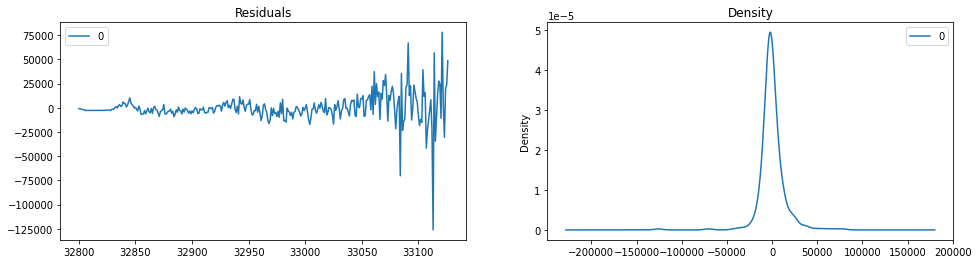

In [ ]:
# Plot of residual errors
residuals = pd.DataFrame(result.resid)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 4))

residuals.plot(title="Residuals", ax=ax1)
residuals.plot(kind='kde', title='Density', ax=ax2)

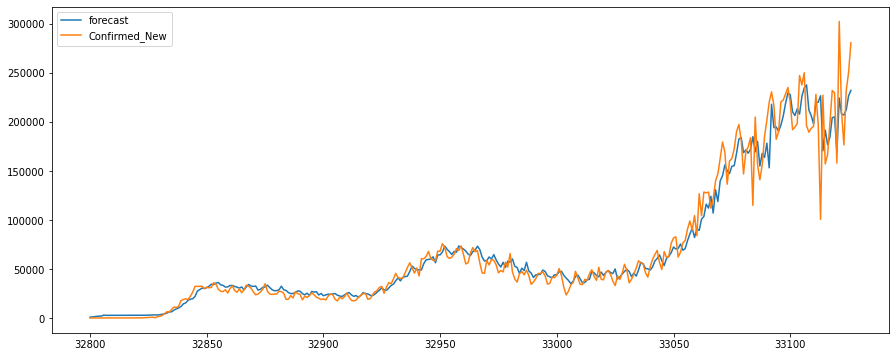

In [ ]:
result.plot_predict(dynamic= False);

**Our predictions are quite good here. So, theoretically our Arima model has fitted correctly.**

**Now we will do actual forecasting using parameters that we found.**

In [ ]:
USA_arima.set_index('date', inplace = True)
print(USA_arima.head())

            Confirmed_New
date                     
2020-02-15             14
2020-02-16              0
2020-02-17              0
2020-02-18              0
2020-02-19              0


In [ ]:
# TRAIN TEST SPLIT
n = int(len(USA_arima) * 0.8)
train = USA_arima.Confirmed_New[:n]
test = USA_arima.Confirmed_New[n:]


# print(len(train))
# print(len(test))

print('############')
print('TRAIN')              # February till November
# print(train.head())
print(train.tail())
print("TEST")               # November to Januray 2021
print(test.head())
# print(test.tail())

############
TRAIN
date
2020-10-29     90689
2020-10-30     98993
2020-10-31     89673
2020-11-01    104488
2020-11-02     84057
Name: Confirmed_New, dtype: int64
TEST
date
2020-11-03    126706
2020-11-04    104298
2020-11-05    128441
2020-11-06    127666
2020-11-07    128444
Name: Confirmed_New, dtype: int64


In [ ]:
# FITTING THE MODEL ON TRAIN DATA : p=6,d=1,q=1
model = ARIMA(train, order=(6, 1, 1))
result = model.fit(disp=0)
print(result.summary())


                             ARIMA Model Results                              
Dep. Variable:        D.Confirmed_New   No. Observations:                  261
Model:                 ARIMA(6, 1, 1)   Log Likelihood               -2578.673
Method:                       css-mle   S.D. of innovations           4709.078
Date:                Mon, 22 Mar 2021   AIC                           5175.346
Time:                        03:30:20   BIC                           5207.426
Sample:                    02-16-2020   HQIC                          5188.241
                         - 11-02-2020                                         
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                   436.9925    346.924      1.260      0.208    -242.966    1116.951
ar.L1.D.Confirmed_New     0.5479      0.066      8.364      0.000       0.419       0.676
ar.L2.D.

In [ ]:
# NOW WE DO THE FORECAST FOR 15 DAYS
step = 15
'''
The output of forecast method:
forecast : ndarray Array of out of sample forecasts 
stderr : ndarray Array of the standard error of the forecasts
conf_int : ndarray 2d array of the confidence interval for the forecast
'''
fc, se, conf = result.forecast(step)

print("\n Forecast Values : \n ", fc)
print("\n And their confidence intervals : \n", conf)


 Forecast Values : 
  [ 86182.92524876  93449.30511882 100076.4043403  101243.79965701
 108118.73906304 102252.45565932  99334.28628929 100891.01663923
 104233.17046988 107126.90980242 111976.65266572 111902.28943594
 110241.55749688 109768.69334333 110643.13465648]

 And their confidence intervals : 
 [[ 76953.30211628  95412.54838124]
 [ 82161.52065445 104737.08958318]
 [ 87787.23459569 112365.57408491]
 [ 88349.39734552 114138.20196849]
 [ 94954.52039648 121282.9577296 ]
 [ 88903.10441572 115601.80690292]
 [ 84613.10821654 114055.46436204]
 [ 84461.42684395 117320.6064345 ]
 [ 86286.16195712 122180.17898264]
 [ 87955.20582387 126298.61378098]
 [ 92009.38421616 131943.92111527]
 [ 91398.17763821 132406.40123366]
 [ 88894.73947019 131588.37552357]
 [ 87245.13254807 132292.25413859]
 [ 86765.88039573 134520.38891723]]


In [ ]:
# Converting forecast to a Series
fc = pd.Series(fc, index=test[:step].index)
print('Forecasted Values :\n ',fc)
# COnverting lower and upper bounds of confidence intervals to series
lower = pd.Series(conf[:, 0], index=test[:step].index)
upper = pd.Series(conf[:, 1], index=test[:step].index)

print('\n Lower bound of predicted values :\n', lower)
print('\n Upper bound of predicted values: \n ', upper)

Forecasted Values :
  date
2020-11-03     86182.925249
2020-11-04     93449.305119
2020-11-05    100076.404340
2020-11-06    101243.799657
2020-11-07    108118.739063
2020-11-08    102252.455659
2020-11-09     99334.286289
2020-11-10    100891.016639
2020-11-11    104233.170470
2020-11-12    107126.909802
2020-11-13    111976.652666
2020-11-14    111902.289436
2020-11-15    110241.557497
2020-11-16    109768.693343
2020-11-17    110643.134656
dtype: float64

 Lower bound of predicted values :
 date
2020-11-03    76953.302116
2020-11-04    82161.520654
2020-11-05    87787.234596
2020-11-06    88349.397346
2020-11-07    94954.520396
2020-11-08    88903.104416
2020-11-09    84613.108217
2020-11-10    84461.426844
2020-11-11    86286.161957
2020-11-12    87955.205824
2020-11-13    92009.384216
2020-11-14    91398.177638
2020-11-15    88894.739470
2020-11-16    87245.132548
2020-11-17    86765.880396
dtype: float64

 Upper bound of predicted values: 
  date
2020-11-03     95412.548381
2020-

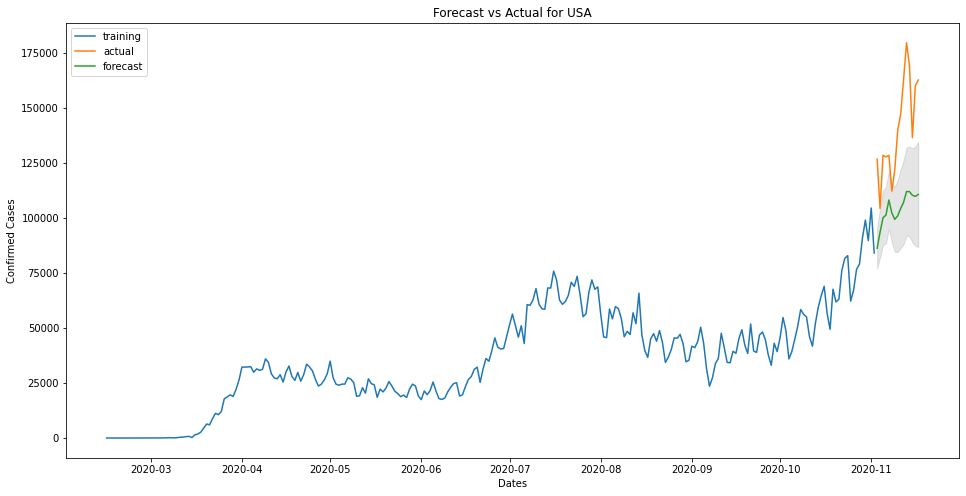

In [ ]:
# PLOTTING THE ACTUAL VS. PREDICTED VALUES:

plt.figure(figsize=(16, 8))
plt.plot(train[:], label = 'training')
plt.plot(test[:step], label="actual")
plt.plot(fc, label="forecast")
plt.fill_between(lower.index, lower, upper, color="k", alpha=0.1)
plt.title("Forecast vs Actual for USA")
plt.xlabel('Dates')
plt.ylabel('Confirmed Cases')
plt.legend(loc="upper left")

In [ ]:
index_dates = test[:step].index
df_forecast_actual = pd.DataFrame(list(zip(index_dates, test[:step].values, np.ceil(fc.values) )), 
               columns =['Date', 'Actual_Confirmed_Cases','Predicted_Confirmed_Cases'])

print(df_forecast_actual)

         Date  Actual_Confirmed_Cases  Predicted_Confirmed_Cases
0  2020-11-03                  126706                    86183.0
1  2020-11-04                  104298                    93450.0
2  2020-11-05                  128441                   100077.0
3  2020-11-06                  127666                   101244.0
4  2020-11-07                  128444                   108119.0
5  2020-11-08                  112134                   102253.0
6  2020-11-09                  121758                    99335.0
7  2020-11-10                  139780                   100892.0
8  2020-11-11                  146919                   104234.0
9  2020-11-12                  162851                   107127.0
10 2020-11-13                  179566                   111977.0
11 2020-11-14                  169173                   111903.0
12 2020-11-15                  136458                   110242.0
13 2020-11-16                  160113                   109769.0
14 2020-11-17            

**ACCURACY METRICS IN TIME SERIES FORECAST**

The commonly used accuracy metrics to judge forecasts are:



1.   Mean Absolute Percentage Error (MAPE)
2.   Mean Absolute Error (MAE)
3.   Root Mean Squared Error (RMSE)
4.   Lag 1 Autocorrelation of Error (ACF1)
5.   Correlation between the Actual and the Forecast (corr)



In [ ]:
def accuracy_metrics(forecast, actual):
    
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    print('Mean Absolute Percentage Error is :', mape*100)
    
    mae = np.mean(np.abs(forecast - actual))    # MAE
    print('Mean Absolute Error is :', mae)
    
    rmse = np.sqrt(np.mean((forecast - actual)**2)) # RMSE
    print('Root Mean Squared Error is : ', rmse)

    corr = np.corrcoef(forecast, actual)
    print('Correlation Matrix between actual and forecast \n',corr,corr[0][1])
    print('Correlation between actual and forecast \n',corr[0][1])


accuracy_metrics(fc, test[:step].values)

Mean Absolute Percentage Error is : 24.89429899223602
Mean Absolute Error is : 36631.310674239765
Root Mean Squared Error is :  40402.74319900152
Correlation Matrix between actual and forecast 
 [[1.         0.72082206]
 [0.72082206 1.        ]] 0.720822060046947
Correlation between actual and forecast 
 0.720822060046947


Around 24.8% MAPE implies the model is about 75.2% accurate in predicting the next 15 observations.

**Lets train model with all the data we have and forecast the COnfirmed Cases into future**

In [ ]:
# USA_arima contains all out data till 7th Jan 2021; we will use all this data for training
print(USA_arima.tail())

            Confirmed_New
date                     
2021-01-03         209895
2021-01-04         176562
2021-01-05         232130
2021-01-06         250442
2021-01-07         280855


In [ ]:
# FITTING THE MODEL ON ALL DATA : p=6,d=1,q=1
model_forecast = ARIMA(USA_arima, order=(6, 1, 1))
result_forecast = model_forecast.fit(disp=0)
print(result_forecast.summary())

                             ARIMA Model Results                              
Dep. Variable:        D.Confirmed_New   No. Observations:                  327
Model:                 ARIMA(6, 1, 1)   Log Likelihood               -3598.540
Method:                       css-mle   S.D. of innovations          14510.351
Date:                Mon, 22 Mar 2021   AIC                           7215.080
Time:                        03:30:21   BIC                           7249.190
Sample:                    02-16-2020   HQIC                          7228.690
                         - 01-07-2021                                         
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                   745.3466    222.667      3.347      0.001     308.928    1181.766
ar.L1.D.Confirmed_New    -0.9239      0.085    -10.857      0.000      -1.091      -0.757
ar.L2.D.

In [ ]:
# Creating future dates:
future_dates = pd.date_range("01-08-2021","22-01-2021")
print(future_dates)

DatetimeIndex(['2021-01-08', '2021-01-09', '2021-01-10', '2021-01-11',
               '2021-01-12', '2021-01-13', '2021-01-14', '2021-01-15',
               '2021-01-16', '2021-01-17', '2021-01-18', '2021-01-19',
               '2021-01-20', '2021-01-21', '2021-01-22'],
              dtype='datetime64[ns]', freq='D')


In [ ]:
# NOW WE DO THE FORECAST FOR 15 DAYS
step = 15
'''
The output of forecast method:
forecast : ndarray Array of out of sample forecasts 
stderr : ndarray Array of the standard error of the forecasts
conf_int : ndarray 2d array of the confidence interval for the forecast
'''
fc_forecast, se_forecast, conf_forecast = result_forecast.forecast(step)

print("\n Forecast Values : \n ", fc)
print("\n And their confidence intervals : \n", conf)

# Converting forecast to a Series
fc_forecast = pd.Series(fc_forecast, index=future_dates)
print('Forecasted Values :\n ',fc_forecast)
# COnverting lower and upper bounds of confidence intervals to series
lower_forecast = pd.Series(conf_forecast[:, 0], index=future_dates)
upper_forecast = pd.Series(conf_forecast[:, 1], index=future_dates)

print('\n Lower bound of predicted values :\n', lower_forecast)
print('\n Upper bound of predicted values: \n ', upper_forecast)


 Forecast Values : 
  date
2020-11-03     86182.925249
2020-11-04     93449.305119
2020-11-05    100076.404340
2020-11-06    101243.799657
2020-11-07    108118.739063
2020-11-08    102252.455659
2020-11-09     99334.286289
2020-11-10    100891.016639
2020-11-11    104233.170470
2020-11-12    107126.909802
2020-11-13    111976.652666
2020-11-14    111902.289436
2020-11-15    110241.557497
2020-11-16    109768.693343
2020-11-17    110643.134656
dtype: float64

 And their confidence intervals : 
 [[ 76953.30211628  95412.54838124]
 [ 82161.52065445 104737.08958318]
 [ 87787.23459569 112365.57408491]
 [ 88349.39734552 114138.20196849]
 [ 94954.52039648 121282.9577296 ]
 [ 88903.10441572 115601.80690292]
 [ 84613.10821654 114055.46436204]
 [ 84461.42684395 117320.6064345 ]
 [ 86286.16195712 122180.17898264]
 [ 87955.20582387 126298.61378098]
 [ 92009.38421616 131943.92111527]
 [ 91398.17763821 132406.40123366]
 [ 88894.73947019 131588.37552357]
 [ 87245.13254807 132292.25413859]
 [ 86765.8

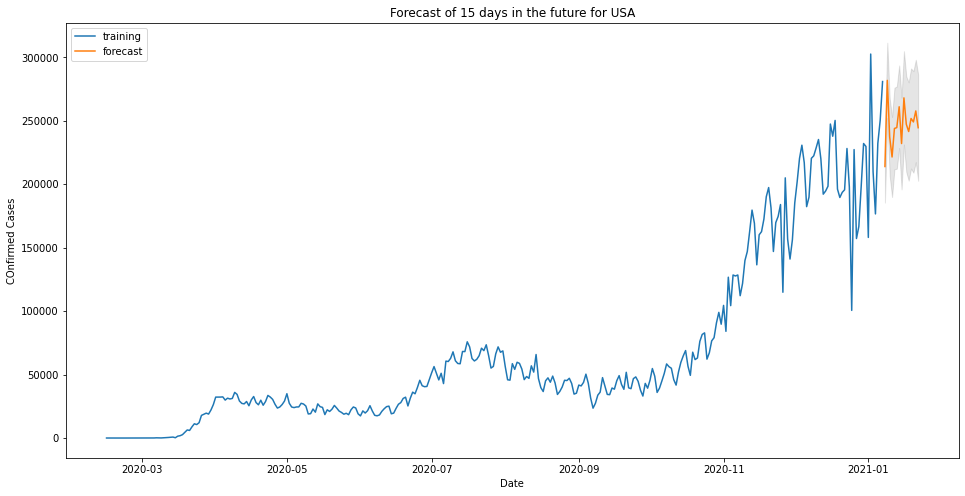

In [ ]:
# Plotting the forecast
plt.figure(figsize=(16, 8))
plt.plot(USA_arima[:], label = 'training')
plt.plot(fc_forecast, label="forecast")
plt.fill_between(lower_forecast.index, lower_forecast, upper_forecast, color="k", alpha=0.1)
plt.title("Forecast of 15 days in the future for USA")
plt.xlabel('Date')
plt.ylabel('COnfirmed Cases')
plt.legend(loc="upper left")